In [1]:
%load_ext autoreload
%autoreload 2

# Random effects model

$y_{i,t} = \alpha_i + \beta_i x_{t-1,i} + \gamma_i w_{t-1} + \epsilon_{t,i}$

$\alpha_i = \alpha_0 + \eta_{\alpha_i}$

$\beta_i = \beta_0 + \eta_{\beta_i}$

$\gamma_i = \gamma_0 + \eta_{\gamma_i}$

$\alpha_0 \sim \mathcal{N}(0, \tau_\alpha)$

$\beta_0 \sim \mathcal{N}(0, \tau_\beta)$

$\gamma_0 \sim \mathcal{N}(0, \tau_\gamma)$

$\eta_{\alpha_i} \sim \mathcal{N}(0, \tau_{\eta_\alpha})$

$\eta_{\beta_i} \sim \mathcal{N}(0, \tau_{\eta_\beta})$

$\eta_{\gamma_i} \sim \mathcal{N}(0, \tau_{\eta_\gamma})$

$\tau_\alpha, \tau_\beta, \tau_\gamma, \tau_{\eta_\alpha}, \tau_{\eta_\beta}, \tau_{\eta_\gamma} \sim \Gamma(1,1)$

In [2]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [3]:
df = read_merged()
df

,,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
country,date,,,,,,,,,
Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...
Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [20]:
from seminartools.models.distance_model import DistanceModel

model = DistanceModel()
model

In [21]:
model.fit(df)

Creating regression coefficients: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ls, intercepts_rotated_, regression_coefficients_gdp_growth_rotated_, regression_coefficients_interest_rate_rotated_, regression_coefficients_unemployment_rate_rotated_, regression_coefficients_commodity_CRUDE_PETRO_rotated_, regression_coefficients_commodity_iNATGAS_rotated_, regression_coefficients_commodity_iAGRICULTURE_rotated_, regression_coefficients_commodity_iMETMIN_rotated_, regression_coefficients_commodity_iPRECIOUSMET_rotated_, sigma]


Sampling 4 chains for 500 tune and 1_500 draw iterations (2_000 + 6_000 draws total) took 272 seconds.


In [22]:
model.trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [23]:
import arviz as az

az.summary(model.trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts_rotated_[0],0.007,0.003,0.002,0.013,0.0,0.0,5187.0,3802.0,1.0
intercepts_rotated_[1],0.008,0.002,0.003,0.012,0.0,0.0,5052.0,4468.0,1.0
intercepts_rotated_[2],-0.002,0.004,-0.010,0.005,0.0,0.0,5302.0,4593.0,1.0
intercepts_rotated_[3],0.009,0.002,0.006,0.013,0.0,0.0,6894.0,4504.0,1.0
intercepts_rotated_[4],0.008,0.002,0.004,0.012,0.0,0.0,7139.0,4419.0,1.0
...,...,...,...,...,...,...,...,...,...
regression_coefficients_commodity_iPRECIOUSMET[15],-0.002,0.012,-0.024,0.022,0.0,0.0,7248.0,5187.0,1.0
regression_coefficients_commodity_iPRECIOUSMET[16],0.001,0.012,-0.021,0.025,0.0,0.0,7893.0,5587.0,1.0
regression_coefficients_commodity_iPRECIOUSMET[17],-0.004,0.012,-0.026,0.019,0.0,0.0,7132.0,4955.0,1.0
regression_coefficients_commodity_iPRECIOUSMET[18],0.001,0.014,-0.026,0.026,0.0,0.0,7756.0,4837.0,1.0


In [28]:
x = az.summary(model.trace)
# all index starting with interceps
x = x[x.index.str.startswith("intercepts[")]
x

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts[0],0.007,0.003,0.002,0.013,0.0,0.0,5187.0,3802.0,1.0
intercepts[1],0.008,0.002,0.003,0.012,0.0,0.0,5052.0,4468.0,1.0
intercepts[2],0.005,0.002,0.001,0.008,0.0,0.0,8515.0,5202.0,1.0
intercepts[3],0.009,0.002,0.006,0.013,0.0,0.0,6894.0,4504.0,1.0
intercepts[4],0.009,0.002,0.005,0.012,0.0,0.0,7075.0,4091.0,1.0
intercepts[5],0.024,0.012,0.000,0.046,0.0,0.0,1925.0,2678.0,1.0
intercepts[6],0.014,0.004,0.006,0.022,0.0,0.0,6729.0,5102.0,1.0
intercepts[7],0.026,0.008,0.011,0.041,0.0,0.0,3661.0,4370.0,1.0
intercepts[8],0.010,0.003,0.005,0.015,0.0,0.0,6444.0,5030.0,1.0
intercepts[9],0.014,0.003,0.008,0.020,0.0,0.0,6537.0,5302.0,1.0


Text(0.5, 1.0, 'Regression intercept per country')

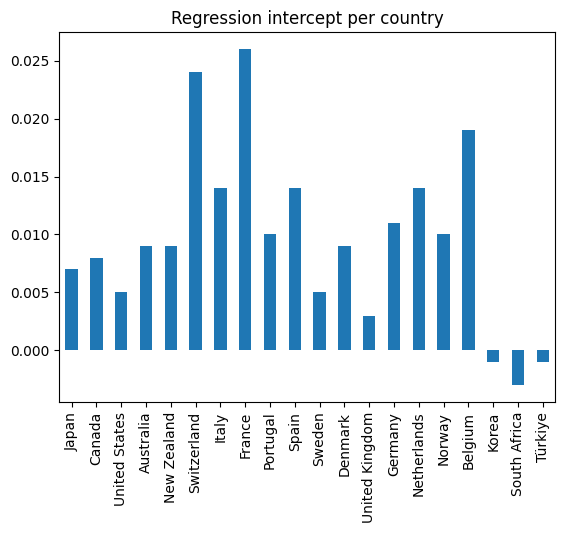

In [31]:
import matplotlib.pyplot as plt
x.set_index(model.countries)["mean"].plot.bar()
plt.title("Regression intercept per country")